In [1]:
import pandas as pd
import numpy as np
import cobra
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from scipy.interpolate import interp1d
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
import requests
import time



/tmp/ipykernel_130250/3583495447.py:10: UserWarning: DelftStack
  warnings.warn('DelftStack')


Figure 1C

In [2]:
#data
folder="/home/bguzman/jupyter/UI/YMC/results/"
T1= pd.read_csv(folder+"predictions_jan27_with_vo2/T1_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T2= pd.read_csv(folder+"predictions_jan27_with_vo2/T2_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T3= pd.read_csv(folder+"predictions_jan27_with_vo2/T3_Solve_Succeeded.csv" ,sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T4= pd.read_csv(folder+"predictions_jan27_with_vo2/T4_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T5= pd.read_csv(folder+"predictions_jan27_with_vo2/T5_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T6= pd.read_csv(folder+"predictions_jan27_with_vo2/T6_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T7= pd.read_csv(folder+"predictions_jan27_with_vo2/T7_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T8= pd.read_csv(folder+"predictions_jan27_with_vo2/T8_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T9= pd.read_csv(folder+"predictions_jan27_with_vo2/T9_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T10= pd.read_csv(folder+"predictions_jan27_with_vo2/T10_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T11= pd.read_csv(folder+"predictions_jan27_with_vo2/T11_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T12= pd.read_csv(folder+"predictions_jan27_with_vo2/T12_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T13= pd.read_csv(folder+"predictions_jan27_with_vo2/T13_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T14= pd.read_csv(folder+"predictions_jan27_with_vo2/T14_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T15= pd.read_csv(folder+"predictions_jan27_with_vo2/T15_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T16=pd.read_csv(folder+"predictions_jan27_with_vo2/T16_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)

allFluxes=pd.DataFrame()
index=0
for i in [T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16]:
    index += 1
    allFluxes["T"+str(index)]=i["flux"]#*10000

In [3]:
#change columns for detailed times
time=["48.32","48.63","48.75","48.83","48.98","49.15","49.32","49.48","49.65","49.82","49.98","50.16","50.33","50.87","51.4","51.95"]
allFluxes.columns = time

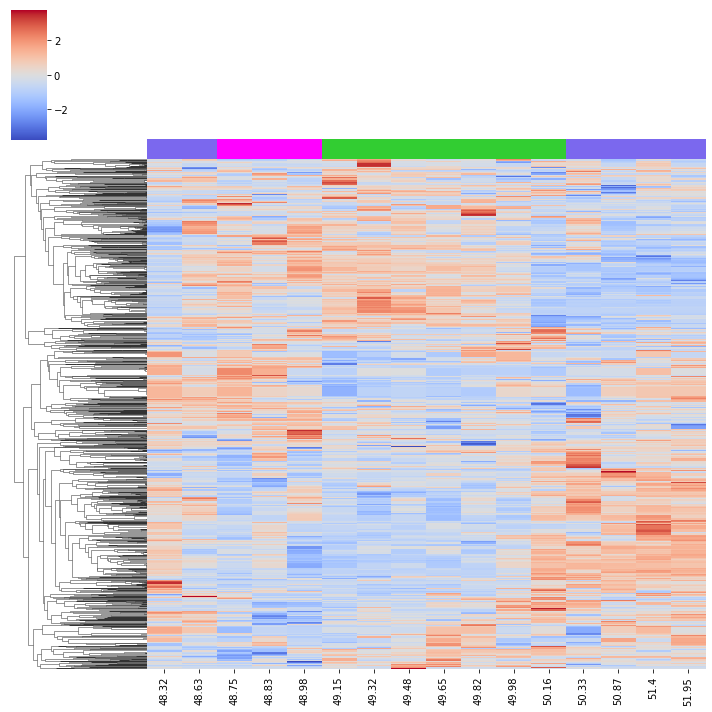

In [5]:
#Heatmap rowClust
colColors=["mediumslateblue","mediumslateblue","magenta","magenta","magenta","limegreen","limegreen","limegreen","limegreen","limegreen","limegreen","limegreen","mediumslateblue","mediumslateblue","mediumslateblue","mediumslateblue"]
allFluxes_norm=allFluxes.apply(lambda x: (x-x.mean())/x.std(), axis = 1)
allFluxes_norm=allFluxes_norm.dropna()
ax=sns.clustermap(allFluxes_norm, cmap=sns.color_palette("coolwarm", as_cmap=True),yticklabels=False,
                  col_cluster=False,col_colors=colColors,metric="euclidean")

plt.savefig("heatmapFluxes_rowClust_times.pdf")

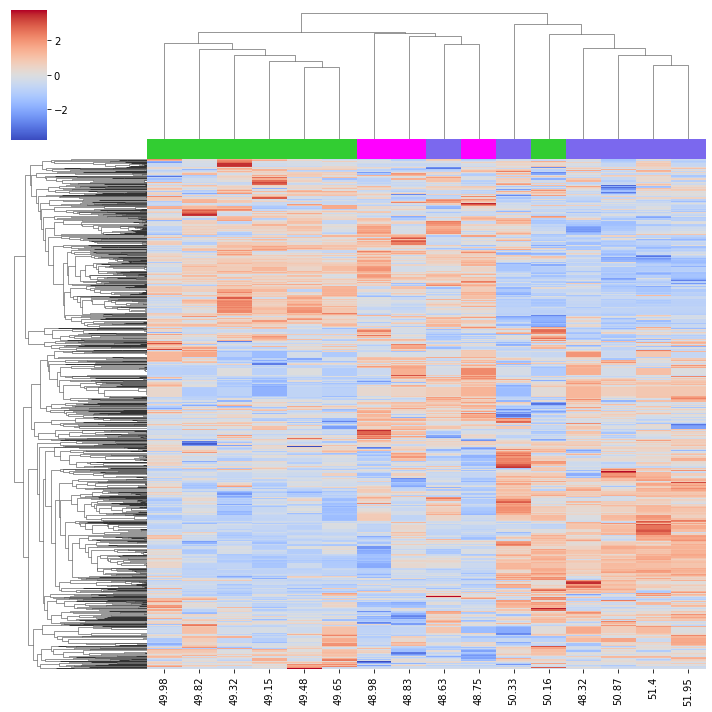

In [6]:
#Heatmap colClust
colColors=["mediumslateblue","mediumslateblue","magenta","magenta","magenta","limegreen","limegreen","limegreen","limegreen","limegreen","limegreen","limegreen","mediumslateblue","mediumslateblue","mediumslateblue","mediumslateblue"]
allFluxes_norm=allFluxes.apply(lambda x: (x-x.mean())/x.std(), axis = 1)
allFluxes_norm=allFluxes_norm.dropna()
ax=sns.clustermap(allFluxes_norm, cmap=sns.color_palette("coolwarm", as_cmap=True),yticklabels=False,
                  col_cluster=True,col_colors=colColors,metric="euclidean")
plt.savefig("heatmapFluxes_colClust_times.pdf")

In [7]:
high,low=1,-1

OX_ref=[low]*16
RB_ref=[low]*16
RC_ref=[low]*16

OX_RB_ref=[low]*16
RB_RC_ref=[low]*16
RC_OX_ref=[low]*16

OX_ref[2:5]=[high]*3
RB_ref[5:12]=[high]*7
RC_ref[12:17]=[high]*4
RC_ref[0:2]=[high]*2

OX_RB_ref[2:5]=[high]*3
OX_RB_ref[5:12]=[high]*7

RB_RC_ref[5:12]=[high]*7
RB_RC_ref[12:17]=[high]*4
RB_RC_ref[0:2]=[high]*2

RC_OX_ref[2:5]=[high]*3
RC_OX_ref[12:17]=[high]*4
RC_OX_ref[0:2]=[high]*2

In [8]:
#Correlation between the precursor and the epigenetic mark
def getCluster(df,references):
    # Computes the correlation
    maxCors,maxRefs=[],[]
    for i in range(len(df)):
        a = np.array(df.iloc[i,:])
        corr=[]
        for reference in references:
            b = np.array(reference)
            corr.append(stats.pearsonr(a,b)[0])
        maxCors.append( np.max(corr)    )
        maxRefs.append( np.argmax(corr) )

    return(maxCors,maxRefs)

In [9]:
references=[OX_ref,RB_ref,RC_ref]##,
#references=[OX_RB_ref,RB_RC_ref,RC_OX_ref]#[OX_ref,RB_ref,RC_ref]#,
#references=[OX_ref,RB_ref,RC_ref,OX_RB_ref,RB_RC_ref,RC_OX_ref]#[OX_ref,RB_ref,RC_ref]#,
maxCors,maxRefs=getCluster(allFluxes_norm,references)

OX (120, 16)
RB (133, 16)
RC (281, 16)


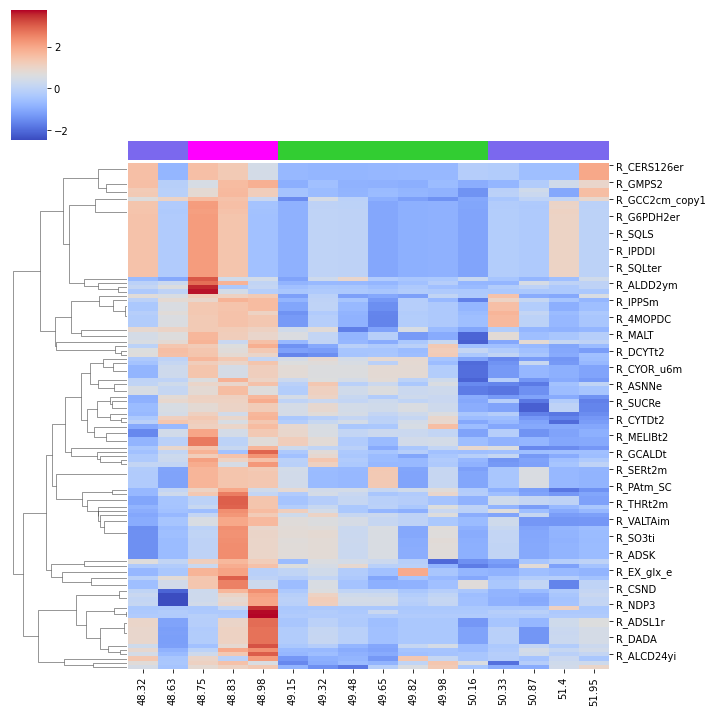

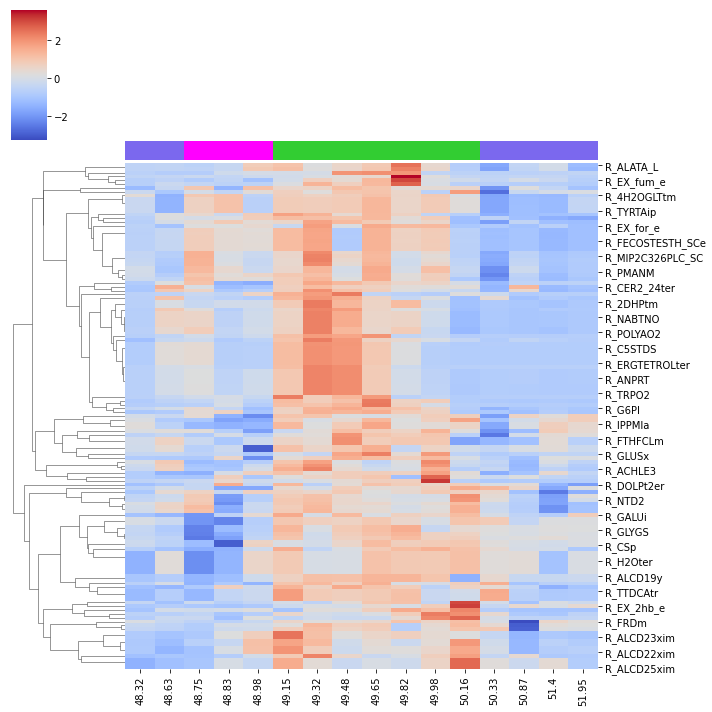

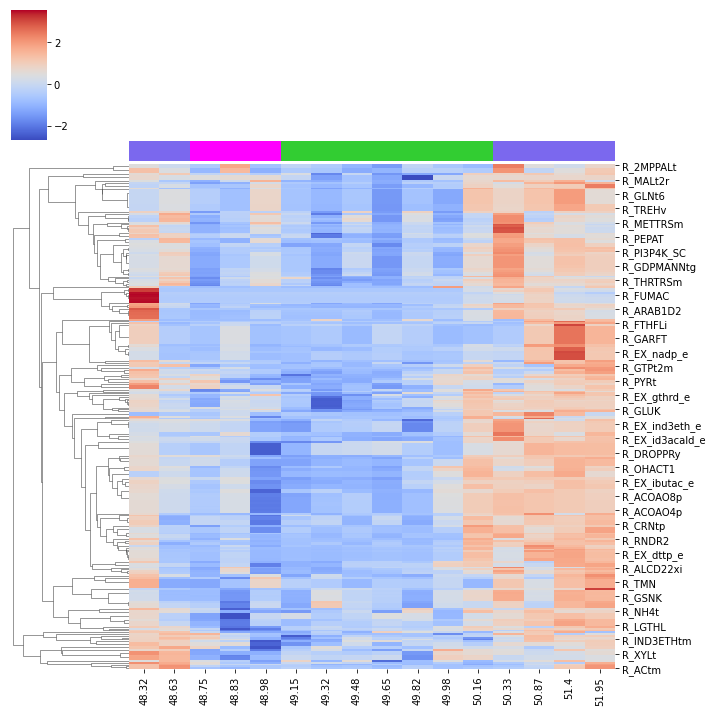

In [10]:
names = ["OX","RB","RC"]
#names = ["OX_RB","RB_RC","RC_OX"]
#names = ["OX","RB","RC","OX_RB","RB_RC","RC_OX"]
colColors=["mediumslateblue","mediumslateblue","magenta","magenta","magenta","limegreen","limegreen","limegreen","limegreen","limegreen","limegreen","limegreen","mediumslateblue","mediumslateblue","mediumslateblue","mediumslateblue"]

for i in range(len(names)):
    name = names[i]
    index=( np.logical_and(np.array(maxRefs)==i,np.array(maxCors)>0.5) )
    df=allFluxes_norm.iloc[index]
    print(name,df.shape)
    ax=sns.clustermap(df, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False,col_colors=colColors,metric="correlation")